In [6]:
import sys
sys.path.append("..")
import numpy as np
from project.ship import Ship
from project.tests import Tests
from project.botma import TMA
import time
from scipy import stats

In [7]:
# Класс для сохранения результатов
tests = Tests('test1')

# Создаем наблюдатель
observer_x, observer_y, observer_course, observer_velocity = 0, 0, 0, 3
observer = Ship('Наблюдатель', observer_x, observer_y, observer_course,
                observer_velocity, verbose=True)
# Создаем объект
target_bearing, target_distance, target_course, target_velocity = 0, 20, 45, 10
target = Ship('Объект', target_bearing, target_distance, target_course,
              target_velocity, observer, mode='bdcv', verbose=True)

In [8]:
# Моделирование траекторий
observer.forward_movement(3 * 60)
observer.change_course(270, 'left', omega=0.5)
observer.forward_movement(2 * 60)
observer.change_course(90, 'right', omega=0.5)
observer.forward_movement(5 * 60)

# Время движения объекта должно совпадать с временем наблюдателя для TMA
target.forward_movement(len(observer.coords[0])-1)

Наблюдатель движется прямо по курсу 0.0° 180с
Наблюдатель перешёл на курс 270.0° за 180с
Наблюдатель движется прямо по курсу 270.0° 120с
Наблюдатель перешёл на курс 90.0° за 360с
Наблюдатель движется прямо по курсу 90.0° 300с
Объект движется прямо по курсу 45.0° 1140с


In [9]:
tma = TMA(observer, target, sd=np.radians(0.5))
tma.print_verbose()

П0 = 0, Д0 = 20 км, К = 45, V = 10 м/c
СКОп = 0.5, tau = 2
Предельно допустимые значения ошибок КПДО:
- 1градус по пеленгу,
- 15%Д по дальности,
- 10 градусов по курсу,
- 10% по скорости.


In [10]:
n = 1000
start_time = time.perf_counter()
dict_results = tma.swarm(n=n, seeded=True, fixed_target=False, fixed_noise=False, p0=[0., 20., 45., 10.])
stop_time = time.perf_counter()
print('Моделирование {} результатов закончено за t={:.1f} секунд'.format(n, stop_time-start_time))
df = tests.get_df(dict_results)
df.head().round(3)

Моделирование 1000 результатов закончено за t=24.3 секунд


,П0_ист,Д0_ист,К0_ист,V0_ист,П0_расч,Д0_расч,К0_расч,V0_расч,П0_апр,Д0_апр,...,СКО X,СКО Y,СКО VX,СКО VY,Ка,Кб,Точ,t,Nf,Iter
0,0.0,29.697,128.734,11.028,359.950,29.862,125.371,10.926,0.0,20.0,...,0.042,1.316,0.610,0.256,0.239,0.129,1.0,0.002,11.0,10.0
1,0.0,23.766,129.658,5.001,359.874,23.919,120.395,4.757,0.0,20.0,...,0.032,0.572,0.246,0.635,0.245,0.396,1.0,0.002,9.0,8.0
2,0.0,24.620,4.667,10.497,0.096,26.429,6.981,5.759,0.0,20.0,...,0.030,1.803,0.084,3.309,0.249,1.333,0.0,0.002,7.0,6.0
3,0.0,29.786,127.467,7.909,0.110,28.458,136.313,8.119,0.0,20.0,...,0.037,0.998,0.392,0.462,0.261,0.389,1.0,0.002,10.0,9.0
4,0.0,48.516,98.502,14.727,359.971,45.633,100.737,13.722,0.0,20.0,...,0.066,3.284,1.324,0.779,0.232,0.333,1.0,0.002,12.0,11.0


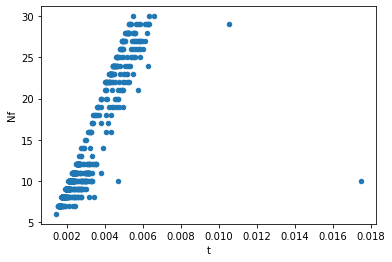

In [11]:
df.plot.scatter(x='t', y='Nf');

In [12]:
res = stats.spearmanr(df['t'], df['Nf'])
print('stat = {}, p-value = {}'.format(*res))

stat = 0.922420283985824, p-value = 0.0


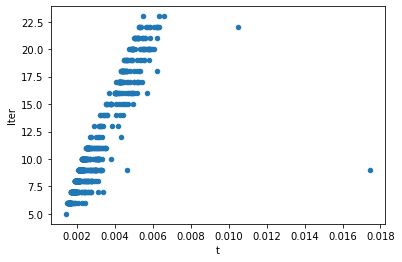

In [13]:
df.plot.scatter(x='t', y='Iter');

In [14]:
res = stats.spearmanr(df['t'], df['Iter'])
print('stat = {}, p-value = {}'.format(*res))

stat = 0.9215240588190953, p-value = 0.0
